In [1]:
# Objective is to link up the devon dataset with a PV system in the area
# start off with predicting PV based on image, not including time series aspect

# Potentially useful tutorial here https://medium.com/analytics-vidhya/fastai-image-regression-age-prediction-based-on-image-68294d34f2ed
# Illinois converting data to numpy https://github.com/jmather625/climatehack/blob/main/data/download_data.ipynb

### 1. Importing data

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt

In [31]:
SATELLITE_ZARR_PATH = "./data/devon-crop.zarr"

dataset = xr.open_dataset(
    SATELLITE_ZARR_PATH, 
    engine="zarr",
    chunks="auto",  # Load the data as a Dask array
)

print(dataset)

<xarray.Dataset>
Dimensions:  (time: 173624, y: 100, x: 100)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T00:05:00 ... 2021-11-07T15:50:00
  * x        (x) float32 -8.221e+05 -8.231e+05 ... -9.201e+05 -9.211e+05
    x_osgb   (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
  * y        (y) float32 4.523e+06 4.524e+06 4.525e+06 ... 4.621e+06 4.622e+06
    y_osgb   (y, x) float32 dask.array<chunksize=(100, 100), meta=np.ndarray>
Data variables:
    data     (time, y, x) int16 dask.array<chunksize=(3946, 100, 100), meta=np.ndarray>


In [32]:
pv_power = xr.open_dataset("data/uk_pv/pv.netcdf", engine="h5netcdf")

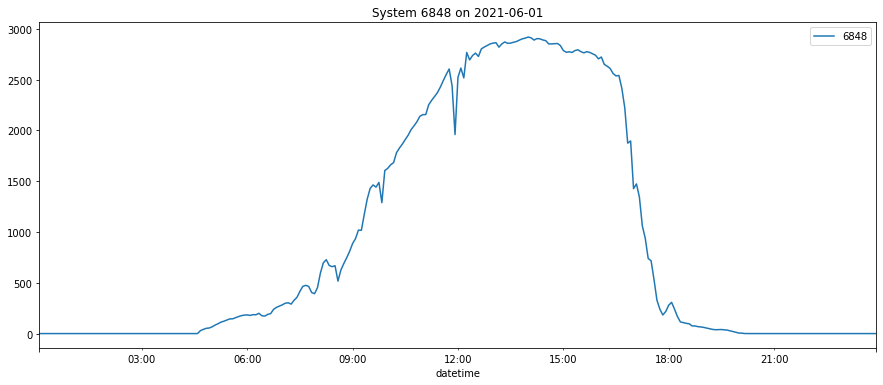

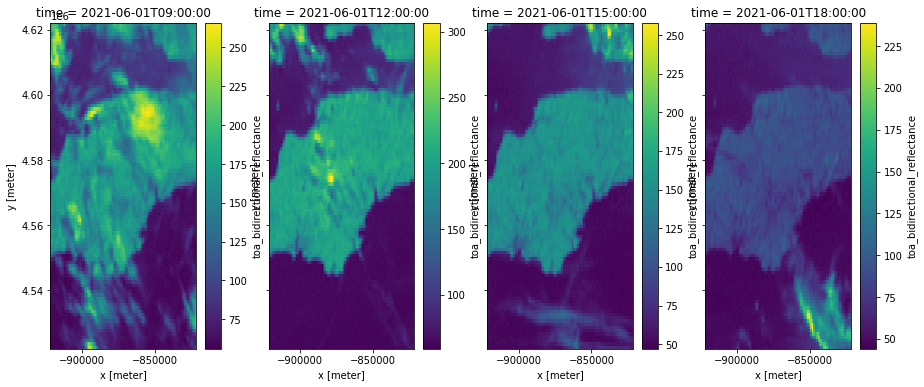

In [6]:
# Getting the images for one day

devon_pv_df = pv_power['6848'].to_dataframe()

# Goal is to get different images to match up with PV yield, maybe 4-8 over the course of a day

devon_pv_df = devon_pv_df[devon_pv_df.index < '2021-06-02']
devon_pv_df = devon_pv_df[devon_pv_df.index > '2021-06-01']

devon_pv_df.plot(figsize=(15,6))
plt.title('System 6848 on 2021-06-01');
plt.savefig('images/system_6848_pv_yield.jpg')

fig, axes = plt.subplots(ncols=4, sharey=True, sharex=True, figsize=(15,6))

dataset['data'].sel(time="2021-06-01 09:00").plot(ax=axes[0])
dataset['data'].sel(time="2021-06-01 12:00").plot(ax=axes[1])
dataset['data'].sel(time="2021-06-01 15:00").plot(ax=axes[2])
dataset['data'].sel(time="2021-06-01 18:00").plot(ax=axes[3]);

plt.savefig('images/system_6848_sat_frames.jpg')

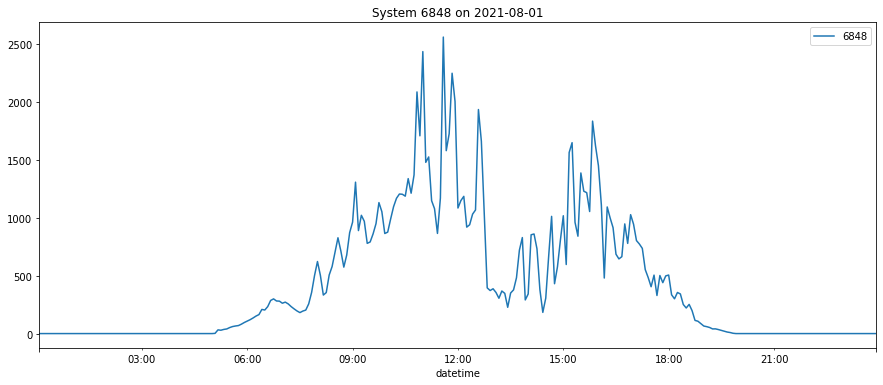

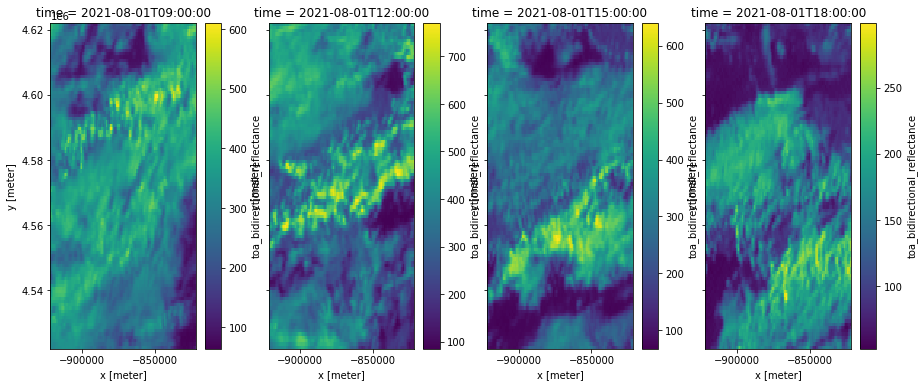

In [7]:
# A much clouder day, August 1st 2021

devon_pv_df = pv_power['6848'].to_dataframe()

# Goal is to get different images to match up with PV yield, maybe 4-8 over the course of a day

devon_pv_df = devon_pv_df[devon_pv_df.index < '2021-08-02']
devon_pv_df = devon_pv_df[devon_pv_df.index > '2021-08-01']

devon_pv_df.plot(figsize=(15,6))
plt.title('System 6848 on 2021-08-01')

fig, axes = plt.subplots(ncols=4, sharey=True, sharex=True, figsize=(15,6))

dataset['data'].sel(time="2021-08-01 09:00").plot(ax=axes[0])
dataset['data'].sel(time="2021-08-01 12:00").plot(ax=axes[1])
dataset['data'].sel(time="2021-08-01 15:00").plot(ax=axes[2])
dataset['data'].sel(time="2021-08-01 18:00").plot(ax=axes[3]);